In [24]:
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset=load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [26]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [27]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset.data,columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [28]:
X = df_diabetes
y = dataset['target']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

<Axes: >

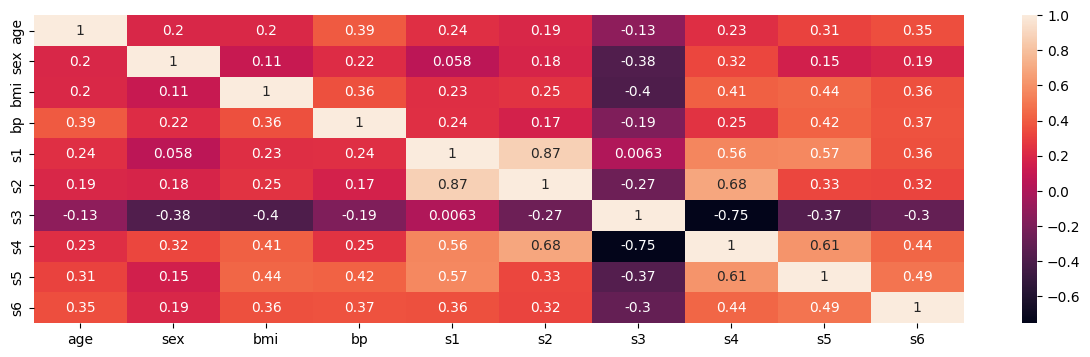

In [30]:
## correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
sns.heatmap(X_train.corr(),annot= True)




In [31]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [32]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [33]:
from sklearn.model_selection import GridSearchCV
regressor = DecisionTreeRegressor()
grid = GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

/Users/kareemalchorbai/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kareemalchorbai/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kareemalchorbai/venv/lib/python3.12/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/Users/kareemalchorbai/venv/lib/python3.12/site-packages/sklearn/base.py", line 471, in _validate_params
    validate_parameter_const

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [34]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [35]:
y_pred=grid.predict(X_test)

In [36]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [37]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.34162471259736393
52.14190886429502
4165.982275780262


In [38]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [39]:
selectedmodel.fit(X_train,y_train)

,criterion,'friedman_mse'
,splitter,'random'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.9, 'x[7] <= -0.003\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'x[2] <= -0.022\nfriedman_mse = 3169.063\nsamples = 120\nvalue = 111.558'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[6] <= 0.032\nfriedman_mse = 1933.534\nsamples = 66\nvalue = 97.636'),
 Text(0.0625, 0.3, 'x[8] <= -0.032\nfriedman_mse = 2967.709\nsamples = 28\nvalue = 109.929'),
 Text(0.03125, 0.1, 'friedman_mse = 2234.242\nsamples = 17\nvalue = 98.588'),
 Text(0.09375, 0.1, 'friedman_mse = 3595.339\nsamples = 11\nvalue = 127.455'),
 Text(0.1875, 0.3, 'x[8] <= -0.025\nfriedman_mse = 978.139\nsamples = 38\nvalue = 88.579'),
 Text(0.15625, 0.1, 'friedman_mse = 917.25\nsamples = 24\nvalue = 86.0'),
 Text(0.21875, 0.1, 'friedman_mse = 1051.571\nsamples = 14\nvalue = 93.0'),
 Text(0.375, 0.5, 'x[8] <= 0.042\nfriedman_mse = 4152.726\nsamples = 54\nvalue = 128.574'),
 Text(0.3125, 0.3, 'x[0] <= 0.053\nfriedman_mse = 3314.6\nsamples = 49\nvalue = 119.367'),
 Text(0.28125, 0.1,

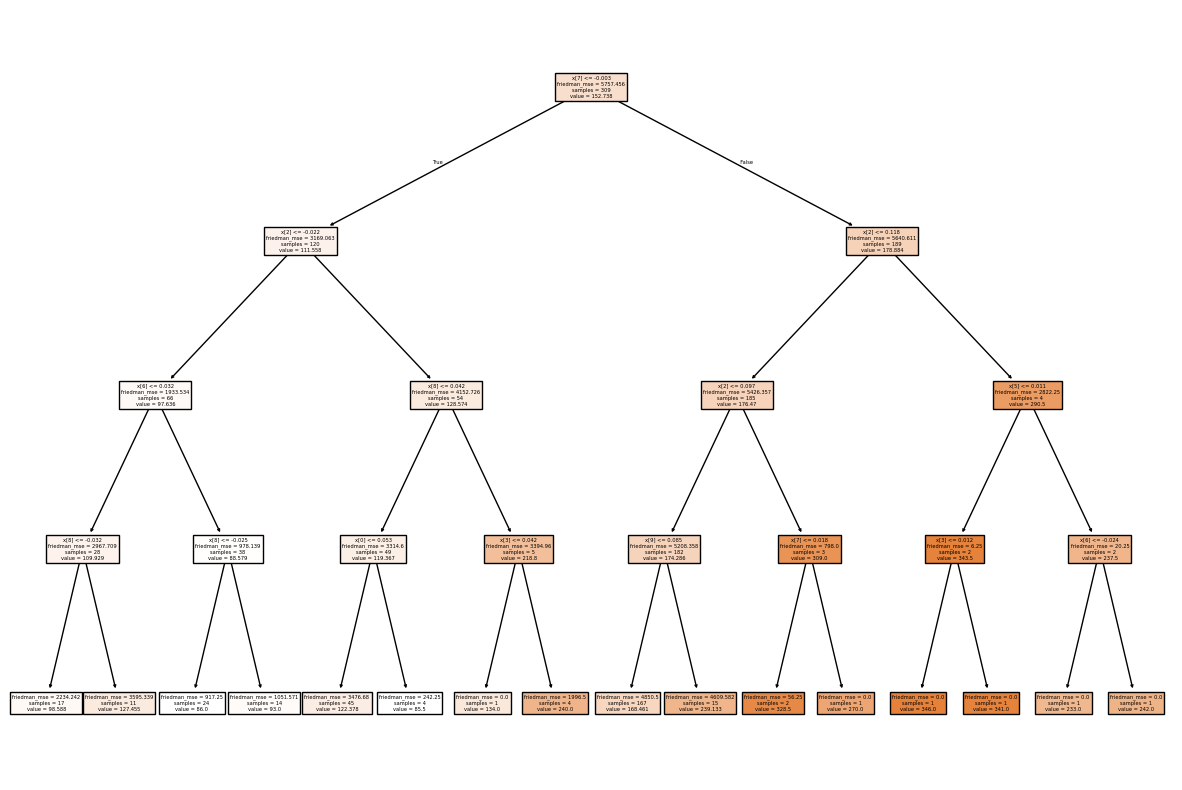

In [40]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)